In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #split the dataset into training and testing sets.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder #standardizing numerical features and encoding categorical features.
from sklearn.compose import ColumnTransformer #apply different transformations to different columns of the dataset.
from sklearn.pipeline import Pipeline #chain multiple preprocessing steps and the classifier into a single pipeline.

df = pd.read_csv('cleaned_adult_2.csv')


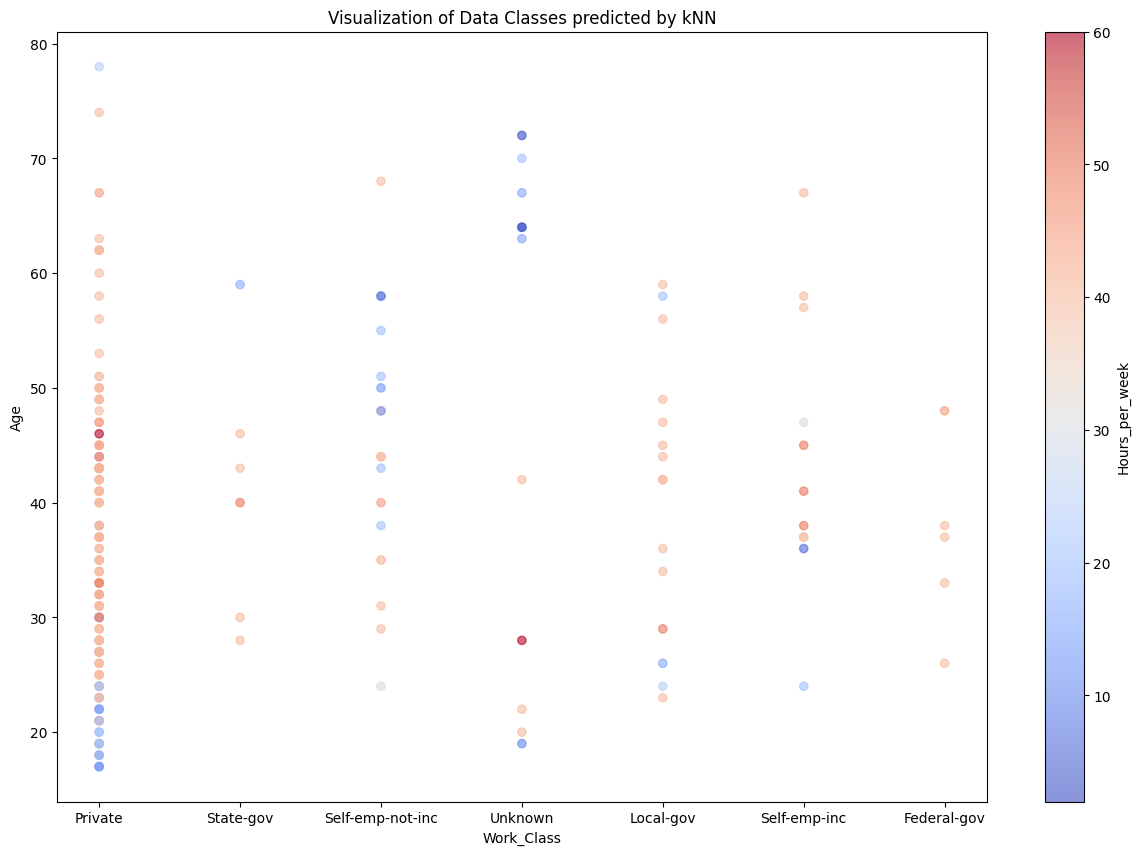

In [36]:
# Define categorical and numerical columns
categorical_cols = ['Work_Class', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race','Sex', 'Native_Country']
numerical_cols = [ 'Capital_Gain', 'Capital_Loss', 'Age','Income']

# Split features and target variable
X = df[categorical_cols + numerical_cols]
y = df['Hours_per_week'] #target

# Split data into training and testing sets
#80% of the data used for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Define preprocessing steps for categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols), #subtracting the mean and scaling to unit variance
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Define the kNN classifier pipeline, single pipeline 
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train) #This fits the pipeline to the training data, applying the preprocessing steps and training the KNN classifier.

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Visualize the data classes
plt.figure(figsize=(15, 10))
plt.scatter(X_test['Work_Class'], X_test['Age'], c=y_pred, cmap='coolwarm', alpha=0.6)
plt.xlabel('Work_Class')
plt.ylabel('Age')
plt.title('Visualization of Data Classes predicted by kNN')
plt.colorbar(label='Hours_per_week')
plt.show()